<a href="https://colab.research.google.com/github/vathsankitha/vathsankitha/blob/main/usl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Assuming the uploaded file is named 'mall_customers_data.csv'
df = pd.read_csv('/content/mall_customers_nYvre7fumT.csv')

# Display the first few rows of the DataFrame
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,56,135,48
1,2,Female,69,130,89
2,3,Male,46,17,1
3,4,Female,32,117,16
4,5,Male,60,76,61


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,135,48
1,130,89
2,17,1
3,117,16
4,76,61


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Female,56,135,48,0
1,2,Female,69,130,89,3
2,3,Male,46,17,1,2
3,4,Female,32,117,16,0
4,5,Male,60,76,61,1


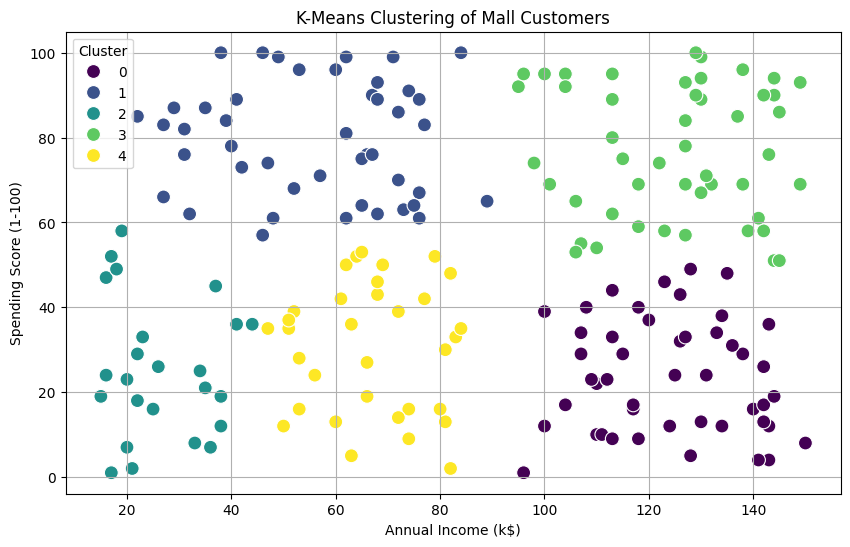

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

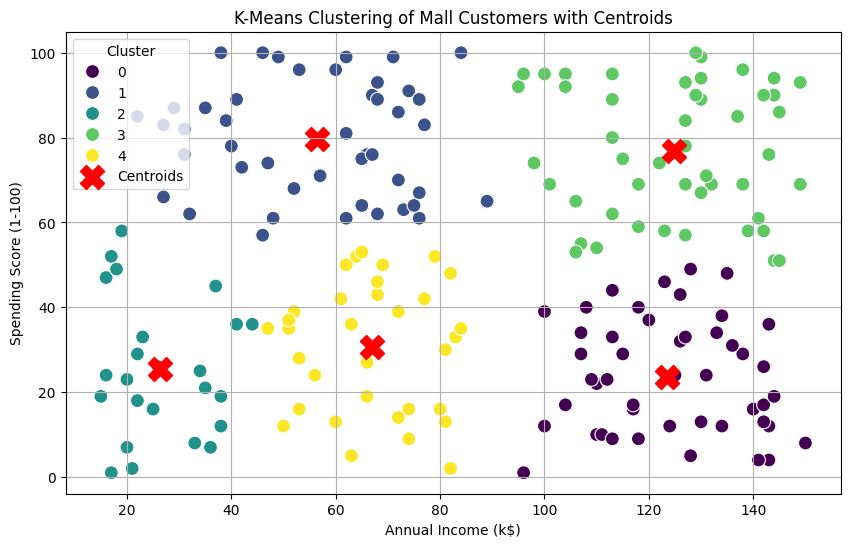

In [ ]:
# Get the cluster centers
centers = kmeans.cluster_centers_

# Overlay the centroids on the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, marker='X', label='Centroids')

plt.title('K-Means Clustering of Mall Customers with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

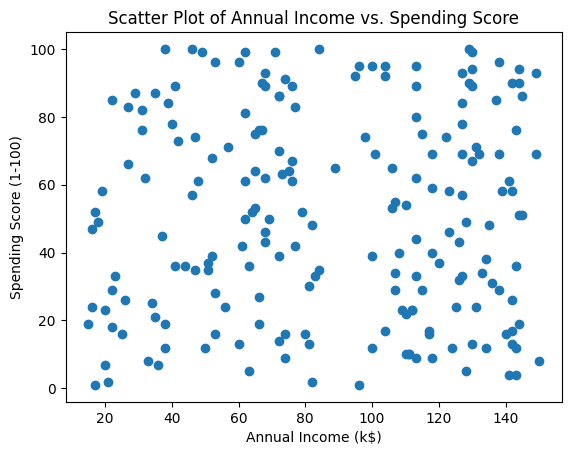

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()

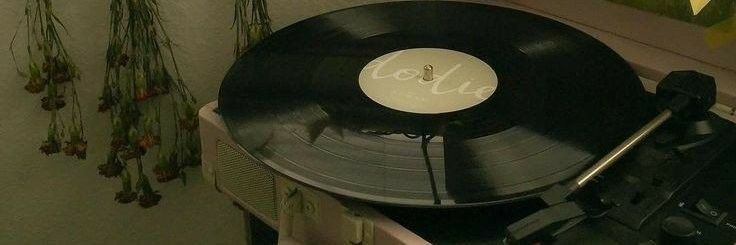

In [ ]:
from IPython.display import Image, display

try:
    display(Image('/content/Aesthetic.jpg'))
except FileNotFoundError:
    print("Please upload 'Aestheteic.jpg' to your Colab environment.")

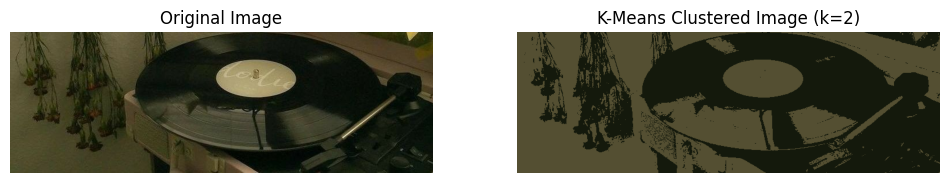

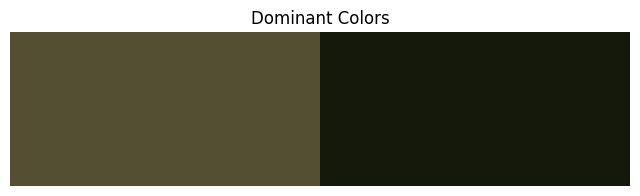

In [ ]:
# prompt: cluster and kmean the image above

from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Aesthetic.jpg'
try:
    img = Image.open(image_path)
    img = img.convert('RGB') # Ensure image is in RGB format
    img_np = np.array(img)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}. Please upload the image.")
    exit()

# Reshape the image data into a 2D array of pixels (height*width, channels)
pixels = img_np.reshape(-1, 3)

# Define the number of clusters (k) - you can adjust this value
k = 2
# Perform K-Means clustering
kmeans_image = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_image.fit(pixels)

# Get the cluster centers (representing the dominant colors)
dominant_colors = kmeans_image.cluster_centers_

# Assign each pixel to its cluster centroid color
new_pixels = dominant_colors[kmeans_image.labels_]

# Reshape the new pixel array back to the original image dimensions
new_img_np = new_pixels.reshape(img_np.shape).astype('uint8')

# Create the new image from the clustered data
clustered_img = Image.fromarray(new_img_np)

# Display the original and clustered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clustered_img)
plt.title(f'K-Means Clustered Image (k={k})')
plt.axis('off')

plt.show()

# Optionally, display the dominant colors
plt.figure(figsize=(8, 2))
plt.imshow([dominant_colors.astype('uint8')], aspect='auto')
plt.title('Dominant Colors')
plt.axis('off')
plt.show()